# Challenge

De acordo com o que foi ensinado no módulo, iremos trabalhar com previsões de vendas de uma loja. O dicionário disponibilizado não é difícil de entender, porém deveremos contar com as implementações que vimos no módulo para:

- Tratar os dados
- Formatar (se necessário)
- Treinar o modelo
- Prever a venda de dezembro
- Montar um histograma dos dados
- Montar um plot de scatter

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [2]:
dados_vendas = {
    'mes': ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
    'vendas': [2000, 2200, 2300, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300]
}

df_vendas = pd.DataFrame(dados_vendas)

In [3]:
df_vendas.head()

,mes,vendas
0,Janeiro,2000
1,Fevereiro,2200
2,Março,2300
3,Abril,2500
4,Maio,2600


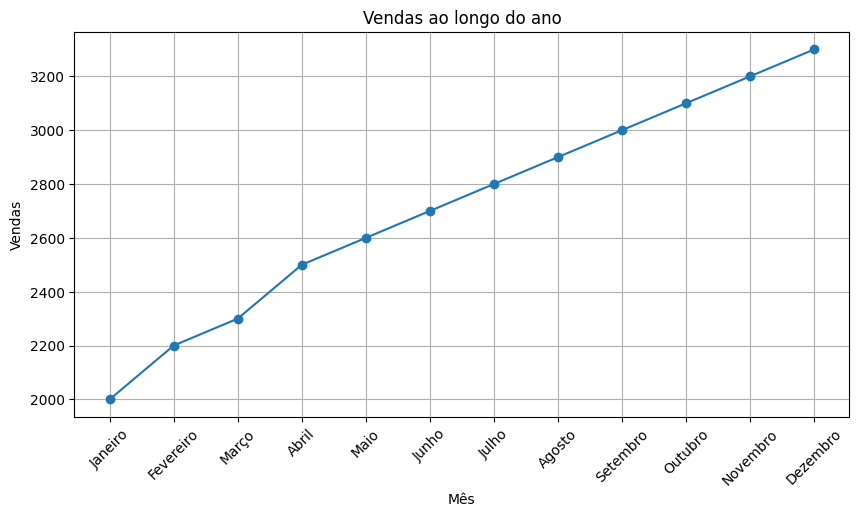

In [4]:
# Visualizando os dados
plt.figure(figsize=(10, 5))
plt.plot(df_vendas['mes'], df_vendas['vendas'], marker='o')
plt.title('Vendas ao longo do ano')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [5]:
# Converte o mês para um valor numérico
months = {
    "Janeiro": 1,
    "Fevereiro": 2,
    "Março": 3,
    "Abril": 4,
    "Maio": 5,
    "Junho": 6,
    "Julho": 7,
    "Agosto": 8,
    "Setembro": 9,
    "Outubro": 10,
    "Novembro": 11,
    "Dezembro": 12
}

df_vendas['mes'] = df_vendas['mes'].map(months)

In [6]:
df_vendas.head()

,mes,vendas
0,1,2000
1,2,2200
2,3,2300
3,4,2500
4,5,2600


In [7]:
# Separando as variáveis independentes e dependentes
X = df_vendas.drop('vendas', axis=1)
y = df_vendas['vendas']

In [8]:
X.head()

,mes
0,1
1,2
2,3
3,4
4,5


In [9]:
y.head()

0    2000
1    2200
2    2300
3    2500
4    2600
Name: vendas, dtype: int64

In [10]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [11]:
# Treinando o modelo de Regressão Linear
model = LinearRegression().fit(X_train, y_train)

In [12]:
# Prevendo os valores de vendas para o conjunto de teste
y_pred = model.predict(X_test)
y_pred

array([3222.48603352, 3113.12849162, 2128.91061453])

In [13]:
# Coeficiente do modelo
model.coef_

array([109.3575419])

In [14]:
# Intercepto do modelo
model.intercept_

np.float64(2019.5530726256984)

In [15]:
# Avaliando o modelo usando o método de avaliação R2
model.score(X_test, y_test)

0.9804933170681456

Dado um score de `0.98`, podemos concluir que o modelo está bem ajustado aos dados.

In [16]:
# Prevê as vendas para o mês de Dezembro
y_dezembro = model.predict(pd.DataFrame({'mes': [12]}))
y_dezembro

array([3331.84357542])

In [17]:
# Calcula o erro médio absoluto
mean_absolute_error(y_test, y_pred)

np.float64(54.84171322160122)

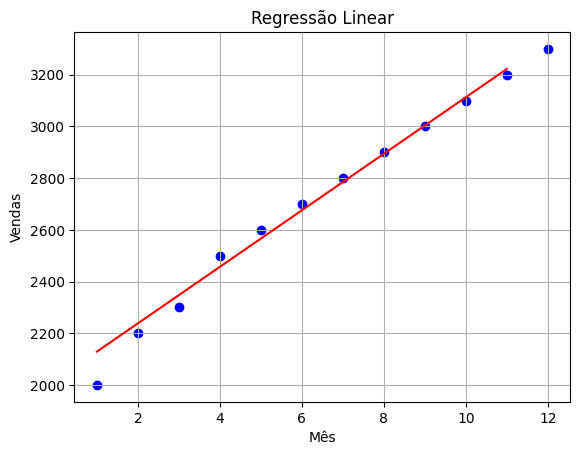

In [18]:
# Plota o gráfico de dispersão com a reta de regressão
plt.scatter(X, y, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.title('Regressão Linear')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.grid()
plt.show()